In [ ]:
import numpy as np
from WorldEnvOHEOracle import WorldEnv
import matplotlib.pyplot as plt
import oracle
from DiscretePySwarms import IntOptimizerPSO
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter

def objective_function(solution):
    env = WorldEnv(n_drones=3,seed=r_seed, max_timesteps=2000)
    observations, infos = env.reset()
    score = [-oracle.get_fitness(env,sol) for sol in solution]
    return score

max_bound = [3 for _ in range((2000 + 1) * 3)]
min_bound = [0 for _ in range((2000 + 1) * 3)]
bounds = (min_bound, max_bound)
options = {"c1": 0.5, "c2": 0.3, "w": 0.9}

optimizer = IntOptimizerPSO(n_particles=10, dimensions=(2000*3)+3, options=options, bounds=bounds)
r_seed=0
cost, pos = optimizer.optimize(objective_function, iters=1000)
actions = oracle.convert_to_dicts(pos)

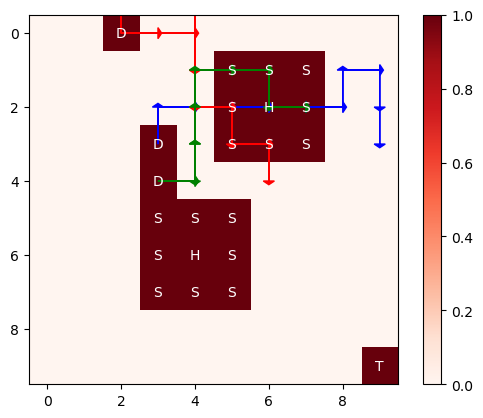

In [19]:
def get_visualisation(all_actions):
    env = WorldEnv(n_drones=3,seed=r_seed, max_timesteps=2000)
    observations, infos = env.reset()
    # Create an empty grid
    fig, ax = plt.subplots()
    grid = np.zeros(env.all_grids[0].shape)
    text_keys = {0:'H',1:'S',2:'T',3:'D',4:'D',5:'D'}
    texts = {'H':[],'S':[],'T':[],'D':[]}
    action_d_conv = {0:[0,1],1:[1,0],2:[0,-1],3:[-1,0]}

    for i,env_grid in enumerate(env.all_grids):
        coords = np.argwhere(env_grid==1)
        for coord in coords:
            texts[text_keys[i]].append(coord)
            grid[coord[0],coord[1]] = 1
            if i == 3:
                current_coords = np.array(coord)
                for actions in all_actions:
                    action = action_d_conv[actions['drone_0']]
                    plt.arrow(current_coords[1], current_coords[0], action[0], action[1], head_width=0.3, head_length=0.1, fc='blue', ec='blue')
                    current_coords[0] = min(9,max(0,current_coords[0] + action[1]))
                    current_coords[1] = min(9,max(0,current_coords[1] + action[0]))
            elif i == 4:
                current_coords = np.array(coord)
                for actions in all_actions:
                    action = action_d_conv[actions['drone_1']]
                    plt.arrow(current_coords[1], current_coords[0], action[0], action[1], head_width=0.3, head_length=0.1, fc='red', ec='red')
                    current_coords[0] = min(9,max(0,current_coords[0] + action[1]))
                    current_coords[1] = min(9,max(0,current_coords[1] + action[0]))
            elif i == 5:
                current_coords = np.array(coord)
                for actions in all_actions:
                    action = action_d_conv[actions['drone_2']]
                    plt.arrow(current_coords[1], current_coords[0], action[0], action[1], head_width=0.3, head_length=0.1, fc='green', ec='green')
                    current_coords[0] = min(9,max(0,current_coords[0] + action[1]))
                    current_coords[1] = min(9,max(0,current_coords[1] + action[0]))

    # Add text annotations
    for key,value in texts.items():
        for v in value:
            ax.text(v[1], v[0], key, ha='center', va='center', color='white')

    # Plot the grid
    plt.imshow(grid, cmap='Reds')
    #plt.gca().invert_yaxis()
    plt.colorbar()
    plt.show()
    
get_visualisation(actions[:10])

In [20]:
actions[:10]

[{'drone_0': 2.0, 'drone_1': 2.0, 'drone_2': 1.0},
 {'drone_0': 1.0, 'drone_1': 1.0, 'drone_2': 2.0},
 {'drone_0': 1.0, 'drone_1': 1.0, 'drone_2': 0.0},
 {'drone_0': 1.0, 'drone_1': 2.0, 'drone_2': 2.0},
 {'drone_0': 1.0, 'drone_1': 0.0, 'drone_2': 2.0},
 {'drone_0': 1.0, 'drone_1': 0.0, 'drone_2': 2.0},
 {'drone_0': 2.0, 'drone_1': 1.0, 'drone_2': 1.0},
 {'drone_0': 1.0, 'drone_1': 0.0, 'drone_2': 1.0},
 {'drone_0': 0.0, 'drone_1': 1.0, 'drone_2': 0.0},
 {'drone_0': 0.0, 'drone_1': 0.0, 'drone_2': 1.0}]